In [1]:
import pandas as pd
import numpy as np

_76ers = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_76ers_FTs.csv')
Bucks = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Bucks_FTs.csv')
Bulls = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Bulls_FTs.csv')
Cavs = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Cavaliers_FTs.csv')
Celtics = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Celtics_FTs.csv')
Clippers = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Clippers_FTs.csv')
Grizzlies = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Grizzlies_FTs.csv')
Hawks = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Hawks_FTs.csv')
Heat = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Heat_FTs.csv')
Hornets = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Hornets_FTs.csv')
Jazz = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Jazz_FTs.csv')
Kings = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Kings_FTs.csv')
Knicks = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Knicks_FTs.csv')
Lakers = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Lakers_FTs.csv')
Magic = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Magic_FTs.csv')
Mavericks = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Mavericks_FTs.csv')
Nets = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Nets_FTs.csv')
Nuggets = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Nuggets_FTs.csv')
Pacers = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Pacers_FTs.csv')
Pelicans = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Pelicans_FTs.csv')
Pistons = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Pistons_FTs.csv')
Raptors = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Raptors_FTs.csv')
Rockets = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Rockets_FTs.csv')
Spurs = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Spurs_FTs.csv')
Suns = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Suns_FTs.csv')
Thunder = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Thunder_FTs.csv')
Timberwolves = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Timberwolves_FTs.csv')
TrailBlazers = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_TrailBlazers_FTs.csv')
Warriors = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Warriors_FTs.csv')
Wizards = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Wizards_FTs.csv')

League = [_76ers,Bucks,Bulls,Cavs,Celtics,Clippers,Grizzlies,Hawks,Heat,Hornets,Jazz,Kings,Knicks,Lakers,Magic,Mavericks,
          Nets,Nuggets,Pacers,Pelicans,Pistons,Raptors,Rockets,Spurs,Suns,Thunder,Timberwolves,TrailBlazers,Warriors,Wizards]
df = pd.concat(League)

In [2]:
#drop 7 rows that doesn't contain actual stats
df = df[df['Tm']!='Tm']

#create new feature 'score', describes how many points team is winning or losing by the time of free-throw
df['UpDownTie']=df['Score (Before)'].str.split(' ', expand=True)[1]
df['Score']=df['Score (Before)'].str.split(' ', expand=True)[2]
df['Score']=np.where(df['UpDownTie']=='tied','0',df['Score'])
df['Score']=df['Score'].astype(float)
df['Score']=np.where(df['UpDownTie']=='down',-df['Score'],df['Score'])

#create 'Player' feature and 'Tm_Player' feature
df['Player']=df['Description'].apply(lambda x: x[:x.find('makes')] if x.find('makes')!=-1 
                                     else (x[:x.find('misses')] if x.find('misses')!=-1 else None))
df['Tm_Player']=df['Tm'].astype(str)+"-"+df['Player'].astype(str)

#create 'Success' feature
df['Success']=df['Description'].apply(lambda x: 1 if 'makes' in x else (0 if 'misses' in x else None))

#create 'Clutch' feature
df['Time_new']=df['Time'].apply(lambda x: x[:2])
df['Time_new']=df['Time_new'].astype(int)
clutch = ((df['Qtr']=='4th') & (df['Time_new'] <= 5)) | df['Qtr'].str.contains('OT')
df['Clutch']=clutch

#create total succeses and failures feature
df["Total_by_Player"]=df.groupby('Tm_Player')['Tm_Player'].transform('count')
df["Success_by_Player"] = df.groupby('Tm_Player')["Success"].transform('sum')
df['Failure_by_Player']=df['Total_by_Player']-df['Success_by_Player']

#create feature Free Throw Rate by Player
df['FTR_by_Player']=(df['Success_by_Player'])/(df['Success_by_Player']+df['Failure_by_Player'])

#drop unnecessary columns
df = df.drop(['UpDownTie','Time_new'],axis=1)

In [3]:
df.head(50)

,Rk,Date,Tm,Unnamed: 3,Opp,Qtr,Time,Score (Before),Description,Score (After),Score,Player,Tm_Player,Success,Clutch,Total_by_Player,Success_by_Player,Failure_by_Player,FTR_by_Player
0,1,10/26/16,PHI,NaN,OKC,1st,09:10.0,PHI up 3 (5-2),D. Saric makes free throw 1 of 2,PHI up 4 (6-2),3.0,D. Saric,PHI-D. Saric,1,False,218,170,48,0.779817
1,2,10/26/16,PHI,NaN,OKC,1st,09:10.0,PHI up 4 (6-2),D. Saric misses free throw 2 of 2,PHI up 4 (6-2),4.0,D. Saric,PHI-D. Saric,0,False,218,170,48,0.779817
2,3,10/26/16,PHI,NaN,OKC,1st,03:28.0,PHI up 4 (18-14),J. Grant misses free throw 1 of 2,PHI up 4 (18-14),4.0,J. Grant,PHI-J. Grant,0,False,8,4,4,0.500000
3,4,10/26/16,PHI,NaN,OKC,1st,03:28.0,PHI up 4 (18-14),J. Grant makes free throw 2 of 2,PHI up 5 (19-14),4.0,J. Grant,PHI-J. Grant,1,False,8,4,4,0.500000
4,5,10/26/16,PHI,NaN,OKC,1st,02:04.0,PHI down 2 (19-21),J. Grant makes free throw 1 of 2,PHI down 1 (20-21),-2.0,J. Grant,PHI-J. Grant,1,False,8,4,4,0.500000
5,6,10/26/16,PHI,NaN,OKC,1st,02:04.0,PHI down 1 (20-21),J. Grant misses free throw 2 of 2,PHI down 1 (20-21),-1.0,J. Grant,PHI-J. Grant,0,False,8,4,4,0.500000
6,7,10/26/16,PHI,NaN,OKC,1st,01:08.0,PHI up 1 (24-23),H. Thompson misses free throw 1 of 2,PHI up 1 (24-23),1.0,H. Thompson,PHI-H. Thompson,0,False,20,13,7,0.650000
7,8,10/26/16,PHI,NaN,OKC,1st,01:08.0,PHI up 1 (24-23),H. Thompson misses free throw 2 of 2,PHI up 1 (24-23),1.0,H. Thompson,PHI-H. Thompson,0,False,20,13,7,0.650000
8,9,10/26/16,PHI,NaN,OKC,2nd,03:21.0,PHI down 3 (41-44),G. Henderson makes free throw 1 of 2,PHI down 2 (42-44),-3.0,G. Henderson,PHI-G. Henderson,1,False,165,133,32,0.806061
9,10,10/26/16,PHI,NaN,OKC,2nd,03:21.0,PHI down 2 (42-44),G. Henderson misses free throw 2 of 2,PHI down 2 (42-44),-2.0,G. Henderson,PHI-G. Henderson,0,False,165,133,32,0.806061


14.0 6.0


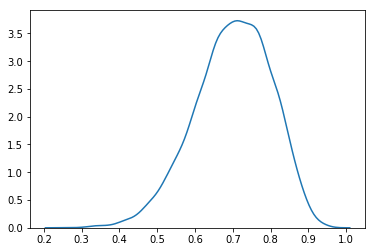

In [4]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#create a function that calculate alpha, beta based on mean and variance
def get_beta_params(mu, var):
    alpha = ((1-mu)/var-1/mu)*mu**2
    beta = alpha*(1/mu -1)
    return alpha, beta

#State prior: mean=0.77, std=0.1(2*std=0.2, meaning 95% players fall in between 0.50 and 0.90)
alpha0, beta0 = get_beta_params(0.70, 0.01)
print(alpha0, beta0)
prior=stats.beta.rvs(alpha0,beta0,size=10000)
sns.kdeplot(prior)

In [5]:
#Input=Player name, return=this player's FTR posteria in-clutch vs. out-clutch
def player_FTR(Tm_Player,df):
    alpha_clutch=df[(df['Success']==1) & df['Clutch'] & (df['Tm_Player']==Tm_Player)].shape[0]
    beta_clutch=df[(df['Success']==0) & df['Clutch'] & (df['Tm_Player']==Tm_Player)].shape[0]
    FTR_clutch=stats.beta.rvs(alpha0+alpha_clutch,beta0+beta_clutch,size=10000)
    alpha_non_clutch=df[(df['Success']==1) & (df['Clutch']-1) & (df['Tm_Player']==Tm_Player)].shape[0]
    beta_non_clutch=df[(df['Success']==0) & (df['Clutch']-1) & (df['Tm_Player']==Tm_Player)].shape[0]
    FTR_non_clutch=stats.beta.rvs(alpha0+alpha_non_clutch,beta0+beta_non_clutch,size=10000)
    return FTR_non_clutch, FTR_clutch

#Input=team name, return= ALL players clutch vs. non-clutch time's kde plots in this team
def chart_player_FTR_by_tm(Tm):
    player_names = df[df['Tm']==Tm]['Tm_Player'].unique()
    for each in player_names:
        total_try = df[df['Tm_Player']==each].shape[0]
        title = each + "(total try=" + str(total_try) +")"
        FTR_non_clutch, FTR_clutch = player_FTR(each, df)
        sns.kdeplot(FTR_non_clutch, label="non clutch"), sns.kdeplot(FTR_clutch, label="clutch")
        plt.title(title)
        plt.figure()

In [6]:
#filter players with more than 250 tries

df_more=df[df['Total_by_Player']>250]
len(df_more['Tm_Player'].unique())

63

/Users/LJin/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


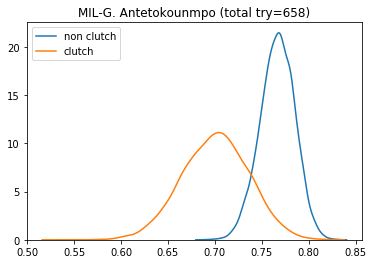

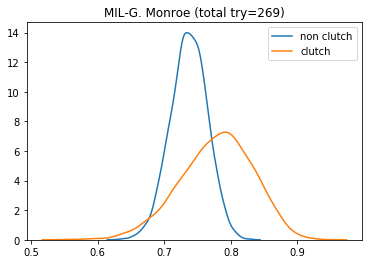

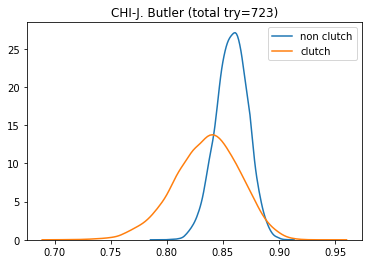

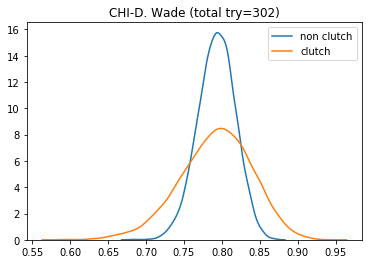

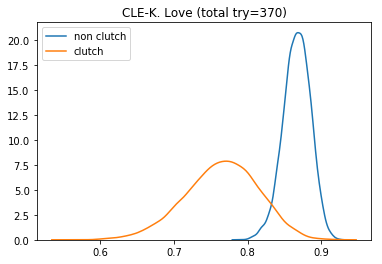

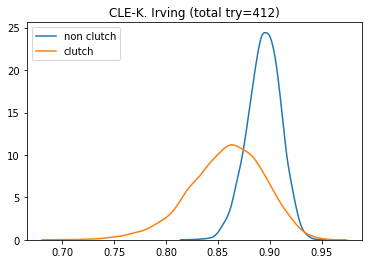

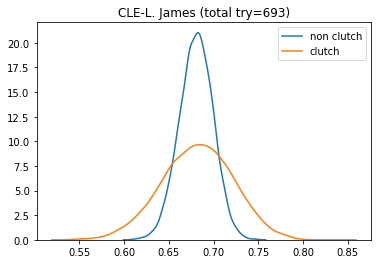

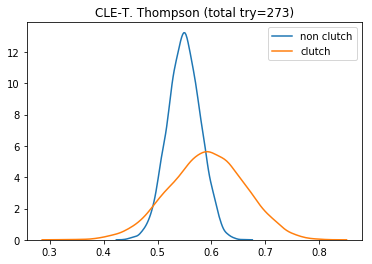

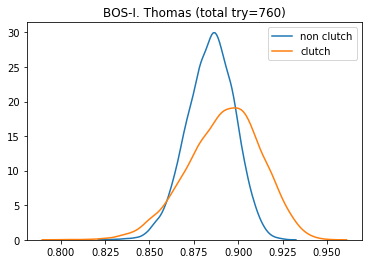

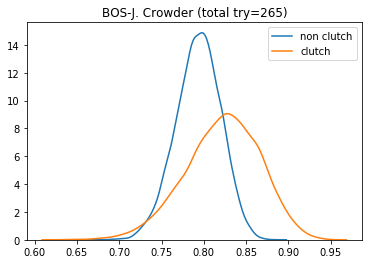

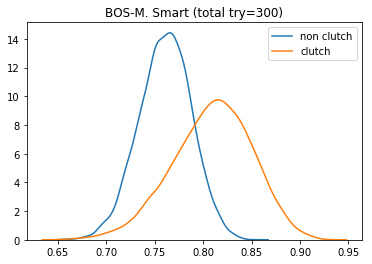

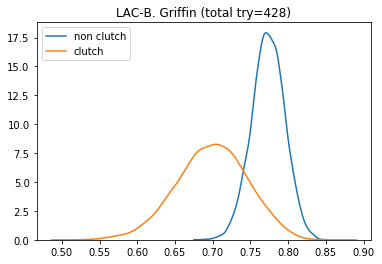

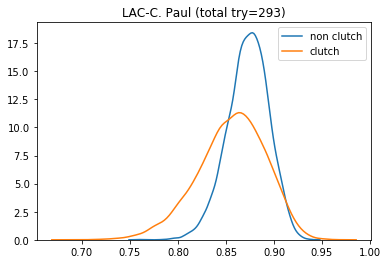

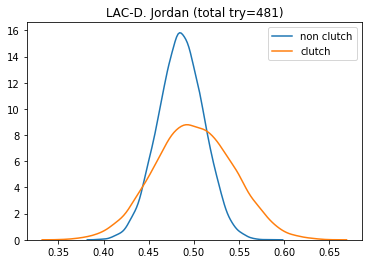

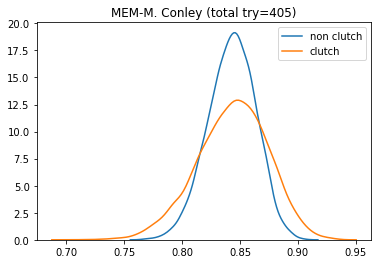

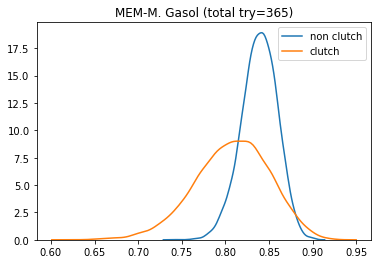

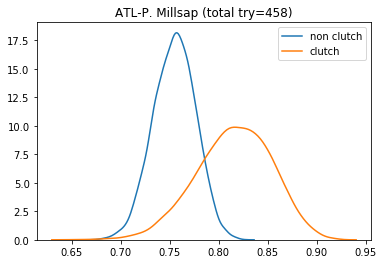

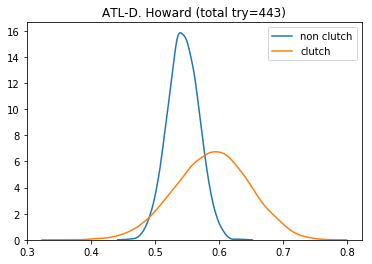

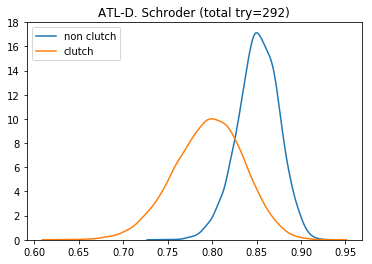

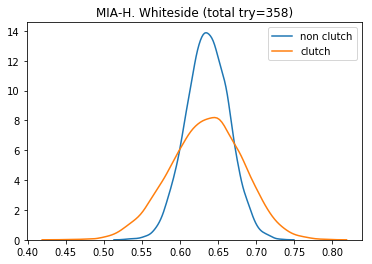

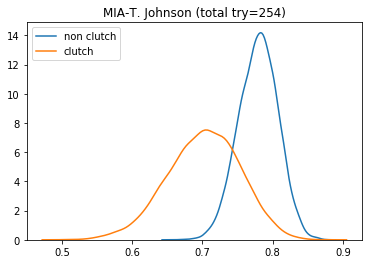

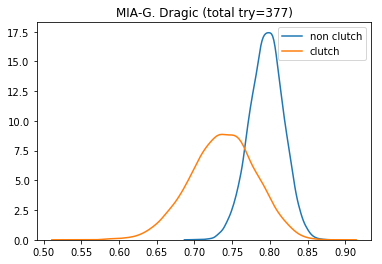

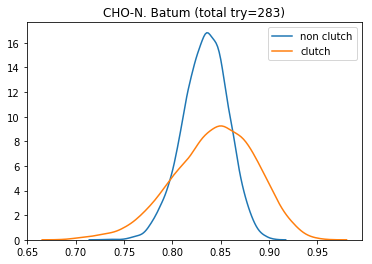

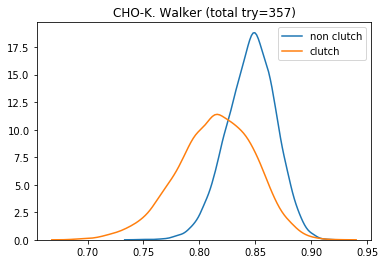

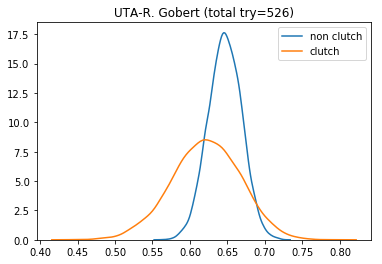

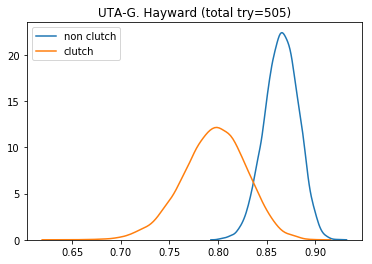

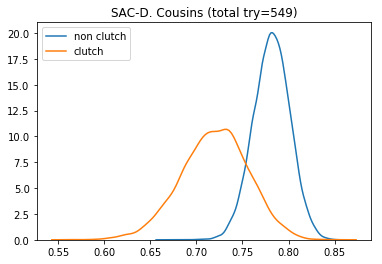

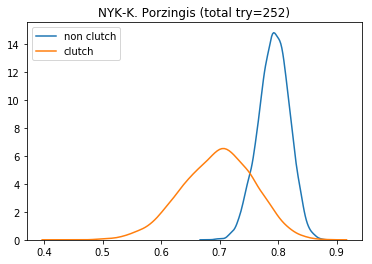

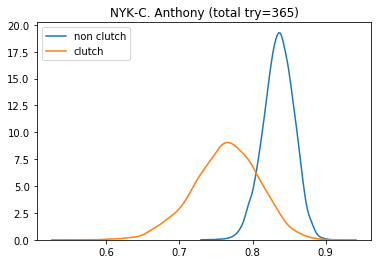

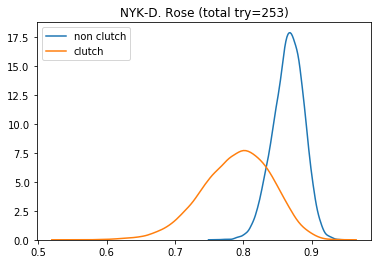

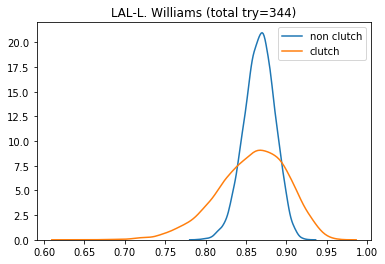

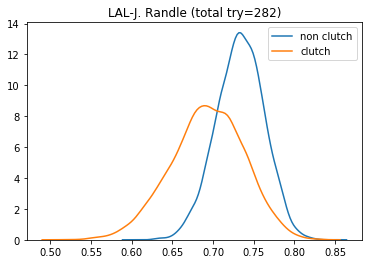

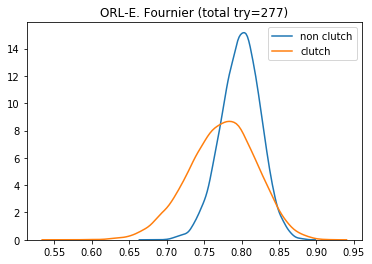

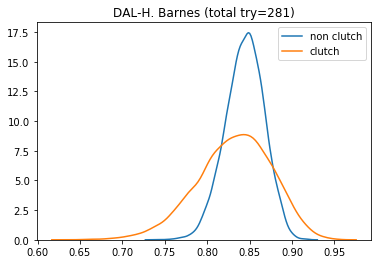

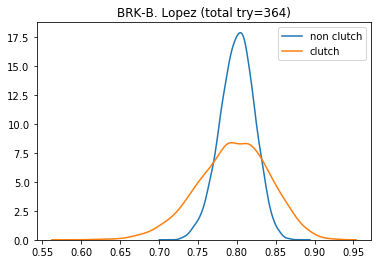

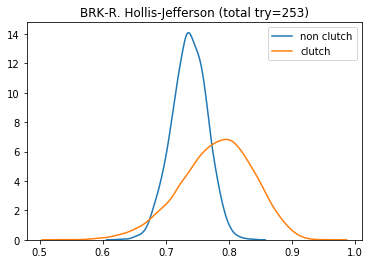

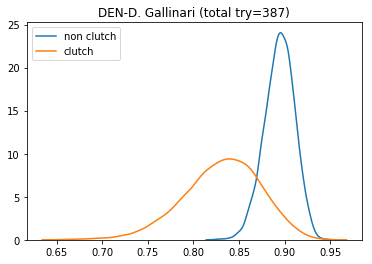

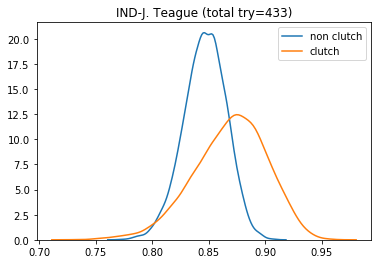

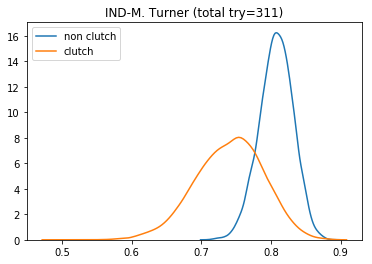

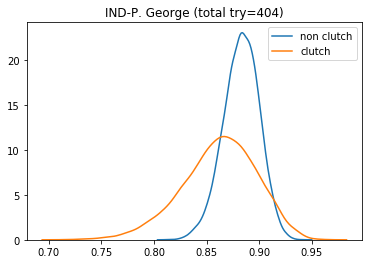

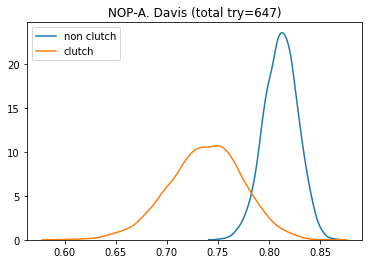

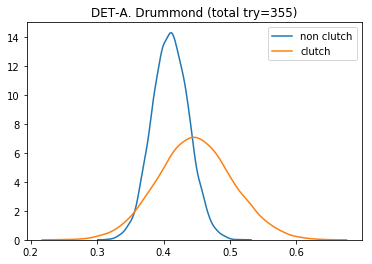

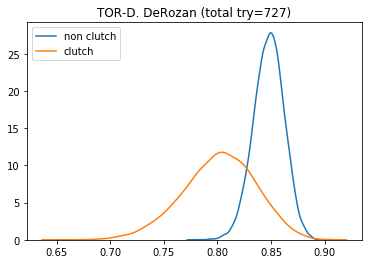

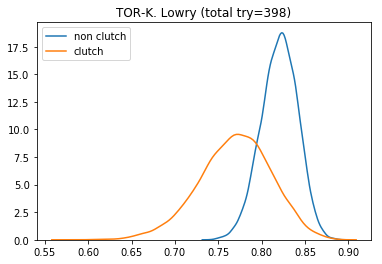

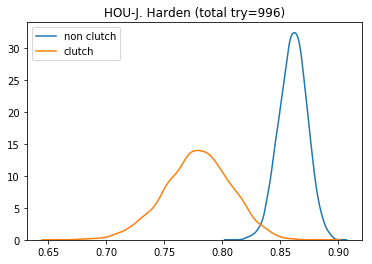

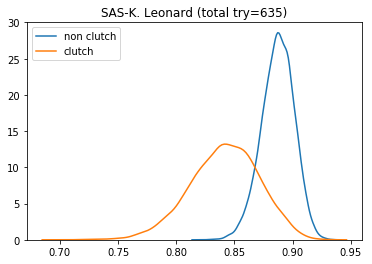

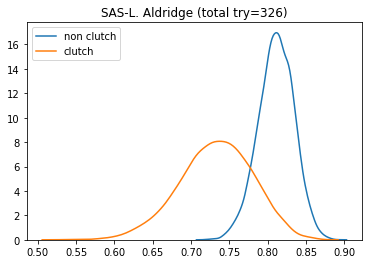

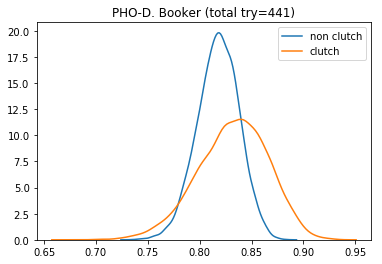

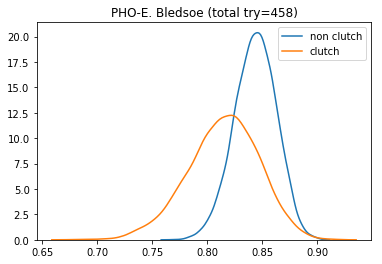

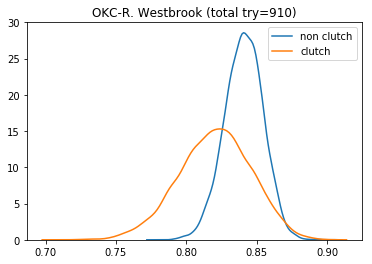

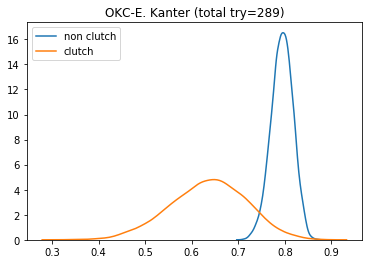

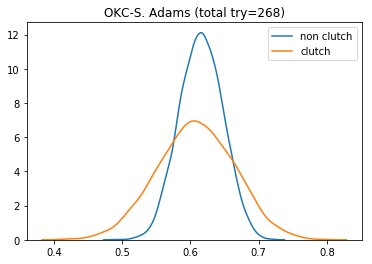

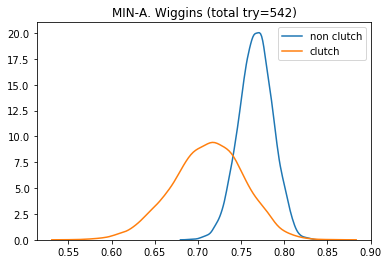

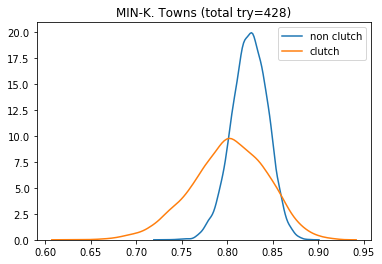

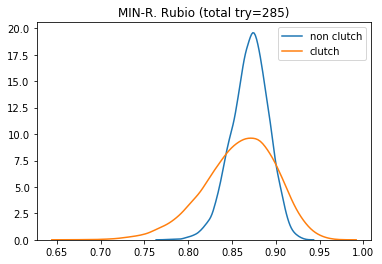

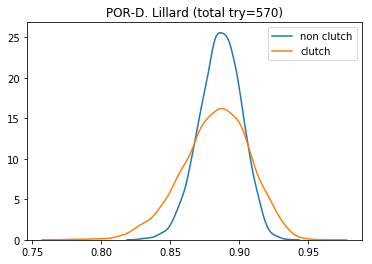

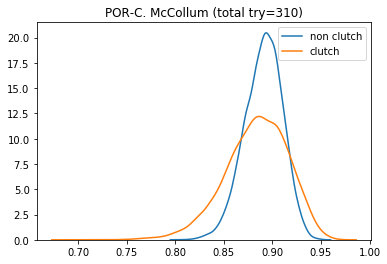

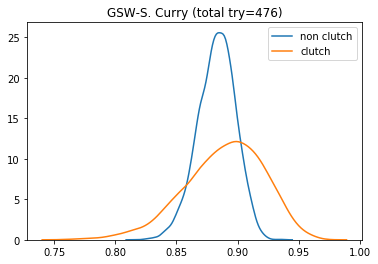

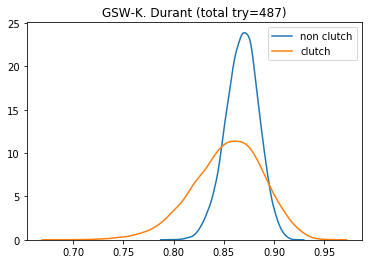

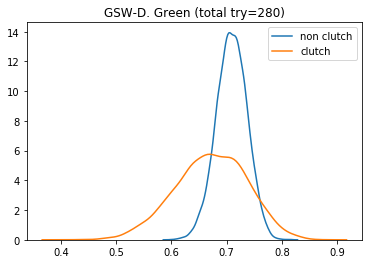

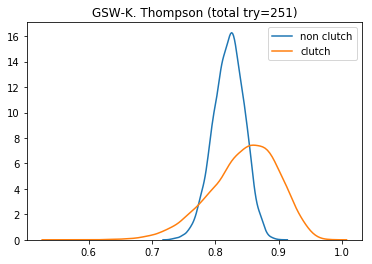

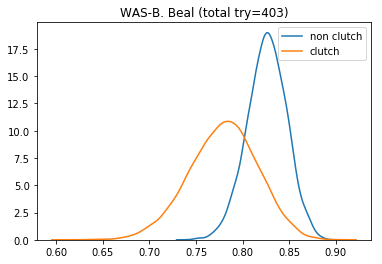

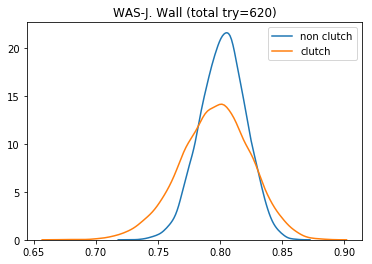

In [7]:
#kde plot for all players with more than 250 tries
for each in df_more['Tm_Player'].unique():
    total_try = df_more[df_more['Tm_Player']==each].shape[0]
    title = each + "(total try=" + str(total_try) +")"
    FTR_non_clutch, FTR_clutch = player_FTR(each, df_more)
    sns.kdeplot(FTR_non_clutch, label="non clutch"), sns.kdeplot(FTR_clutch, label="clutch")
    plt.title(title)
    plt.figure()
plt.savefig('FTR posterial - All player over 250.png')

In [8]:
def chart_player_FTR(player,df):
    FTR_non_clutch, FTR_clutch = player_FTR(player, df)
    sns.kdeplot(FTR_non_clutch, label="non clutch"), sns.kdeplot(FTR_clutch, label="clutch")
    total_try = df[df['Tm_Player']==player].shape[0]
    title = player + "(total try=" + str(total_try) +")"
    plt.title(title)
    plt.figure()

In [9]:
print("Players with better clutch time performance:",)
for each in df_more['Tm_Player'].unique():
    FTR_non_clutch, FTR_clutch = player_FTR(each, df_more)
    higher_rate=np.mean(FTR_clutch>FTR_non_clutch)
    if higher_rate>0.5:
        print(each, higher_rate)

Players with better clutch time performance:
MIL-G. Monroe  0.7495
CHI-D. Wade  0.5082
CLE-L. James  0.5121
CLE-T. Thompson  0.7114
BOS-I. Thomas  0.6438
BOS-J. Crowder  0.7243
BOS-M. Smart  0.8318
LAC-D. Jordan  0.6126
MEM-M. Conley  0.5076
ATL-P. Millsap  0.9124
ATL-D. Howard  0.7649
CHO-N. Batum  0.593
BRK-R. Hollis-Jefferson  0.7587
IND-J. Teague  0.7331
DET-A. Drummond  0.7235
PHO-D. Booker  0.6493
GSW-S. Curry  0.583
GSW-K. Thompson  0.6747


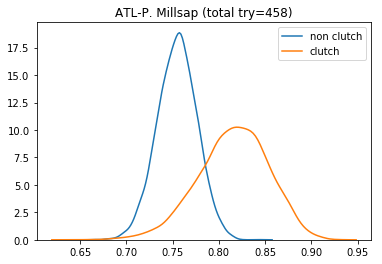

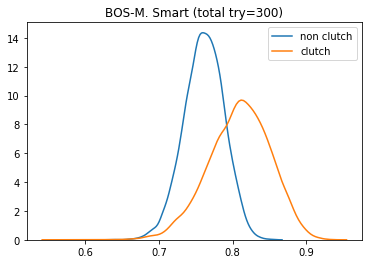

In [10]:
chart_player_FTR("ATL-P. Millsap ",df_more)
chart_player_FTR("BOS-M. Smart ",df_more)

In [11]:
print("Players with worse clutch time performance:")    
for each in df_more['Tm_Player'].unique():
    FTR_non_clutch, FTR_clutch = player_FTR(each, df_more)
    higher_rate=np.mean(FTR_clutch>FTR_non_clutch)
    if higher_rate<0.5:
        print(each, higher_rate)

Players with worse clutch time performance:
MIL-G. Antetokounmpo  0.0462
CHI-J. Butler  0.247
CLE-K. Love  0.0205
CLE-K. Irving  0.1789
LAC-B. Griffin  0.072
LAC-C. Paul  0.3487
MEM-M. Gasol  0.2525
ATL-D. Schroder  0.1133
MIA-H. Whiteside  0.4939
MIA-T. Johnson  0.093
MIA-G. Dragic  0.1197
CHO-K. Walker  0.2183
UTA-R. Gobert  0.3162
UTA-G. Hayward  0.0264
SAC-D. Cousins  0.0671
NYK-K. Porzingis  0.0674
NYK-C. Anthony  0.0662
NYK-D. Rose  0.0836
LAL-L. Williams  0.4401
LAL-J. Randle  0.2368
ORL-E. Fournier  0.3192
DAL-H. Barnes  0.4219
BRK-B. Lopez  0.4622
DEN-D. Gallinari  0.0736
IND-M. Turner  0.1045
IND-P. George  0.3114
NOP-A. Davis  0.0292
TOR-D. DeRozan  0.1006
TOR-K. Lowry  0.1315
HOU-J. Harden  0.002
SAS-K. Leonard  0.0728
SAS-L. Aldridge  0.0659
PHO-E. Bledsoe  0.2264
OKC-R. Westbrook  0.2371
OKC-E. Kanter  0.0287
OKC-S. Adams  0.4616
MIN-A. Wiggins  0.1122
MIN-K. Towns  0.3193
MIN-R. Rubio  0.4159
POR-D. Lillard  0.4726
POR-C. McCollum  0.4377
GSW-K. Durant  0.3775
GSW-D. Gre

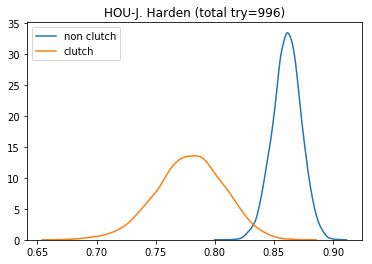

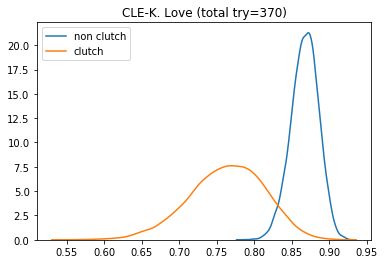

In [12]:
chart_player_FTR("HOU-J. Harden ",df_more)
chart_player_FTR("CLE-K. Love ",df_more)